## Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df=pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [3]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
encoder = LabelEncoder()
df[' Label']= encoder.fit_transform(df[' Label'])

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,0
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [6]:
df[' Label'].value_counts().sum

<bound method Series.sum of  Label
0    189067
1      1966
Name: count, dtype: int64>

In [7]:
df = df.fillna(0)
df = df.replace([np.inf, -np.inf], 0)

In [8]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [9]:
df=df.astype(int)

In [10]:
X = df.drop(' Label',axis=1)
y = df[' Label']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

num_columns = df.shape[1]

k = min(10, num_columns)

k_best = SelectKBest(score_func=f_classif, k=k)
X_new = k_best.fit_transform(X_imputed, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [13]:
selected_features_mask = k_best.get_support()

In [14]:
elected_feature_names = X.columns[selected_features_mask]

In [15]:
elected_feature_names

Index([' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward'],
      dtype='object')

In [16]:
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']
df_new=X[new_columns]
df_new

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward
0,3268,72,72,0,0,0,0,201,72,32
1,389,316,316,0,0,0,0,201,316,32
2,0,0,0,0,0,0,0,0,0,0
3,5355,0,0,0,28,0,0,28,0,32
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
191028,53,177,177,32,45,0,0,45,177,20
191029,53,136,136,11695,40,0,0,40,136,32
191030,53,177,177,9009,45,0,0,45,177,32
191031,123,48,48,59,48,0,0,48,48,20


In [17]:
df_new['label']=df[' Label']

<ipython-input-17-727912427b81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df[' Label']


In [18]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [25]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer ='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])

early_stopping = EarlyStopping(monitor='accuracy', patience=2, restore_best_weights=True)

history = ann.fit(X_train,y_train,batch_size=32,epochs=10,callbacks=[early_stopping])

Epoch 1/10
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9894 - loss: 0.0000e+00
Epoch 2/10
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9894 - loss: 0.0000e+00
Epoch 3/10
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9898 - loss: 0.0000e+00


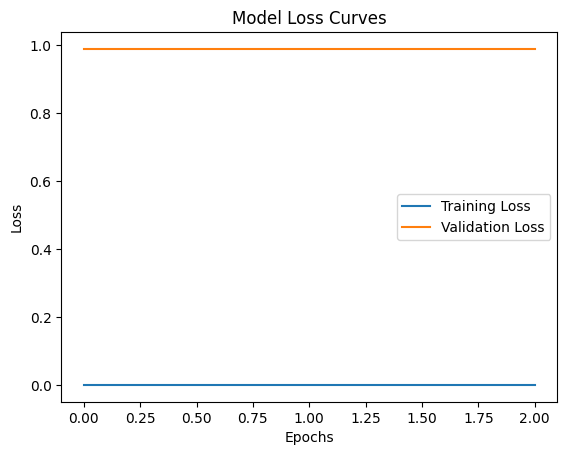

In [26]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Validation Loss')

plt.title('Model Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (133723, 10)
X_test shape: (57310, 10)
y_train shape: (133723,)
y_test shape: (57310,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
print("Mean Absolute Error:",  mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",  mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 8.160362502113839e-17
Mean Squared Error: 1.468519158250575e-32
R-squared: 1.0


In [40]:
def predict_intrusion():

    features = [
        "Destination Port", "Bwd Packet Length Min", "Bwd Packet Length Mean",
        "Bwd Packets/s", "Min Packet Length", "PSH Flag Count",
        "URG Flag Count", "Avg Fwd Segment Size", "Avg Bwd Segment Size",
        "min_seg_size_forward"
    ]
    user_input = []
    for feature in features:
        value = int(input(f"Enter value for {feature}: "))
        user_input.append(value)

    user_input = np.array([user_input])
    prediction = ann.predict(user_input)

    print(f"Model Prediction: {prediction}")

    if prediction[0][0] > 0.5:
        print("Prediction: Intrusion detected!")
    else:
        print("Prediction: No intrusion detected.")

predict_intrusion()

Enter value for Destination Port: 3268
Enter value for Bwd Packet Length Min: 72
Enter value for Bwd Packet Length Mean: 72
Enter value for Bwd Packets/s: 0
Enter value for Min Packet Length: 0
Enter value for PSH Flag Count: 0
Enter value for URG Flag Count: 0
Enter value for Avg Fwd Segment Size: 201
Enter value for Avg Bwd Segment Size: 72
Enter value for min_seg_size_forward: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Prediction: [[9.705563e-19]]
Prediction: No intrusion detected.
